In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',50)
pd.set_option('display.max_colwidth', None)


In [50]:
df = pd.read_csv("kiva_loan.csv")
df.head(10)

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12.0,12,irregular
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used in their business.,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,11.0,14,irregular
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another one to rent out as a source of income,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2014-01-01 16:01:36+00:00,43.0,6,bullet
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variety of new embroidery materials.,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00,11.0,8,irregular
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00,14.0,16,monthly
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,Kenya,NaN,KES,NaN,2014-01-01 10:06:19+00:00,2014-01-29 14:14:57+00:00,4.0,6,irregular
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk products business .,India,Maynaguri,INR,334.0,2014-01-01 09:51:02+00:00,2014-01-01 17:18:09+00:00,43.0,8,bullet
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,Pakistan,Ellahabad,PKR,245.0,2014-01-01 11:46:01+00:00,2014-01-10 18:18:44+00:00,14.0,8,monthly
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels in different sizes along with spools of thread.",Pakistan,Lahore,PKR,245.0,2014-01-01 11:49:43+00:00,2014-01-01 18:47:21+00:00,14.0,19,monthly
9,653048,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal for selling ladoo.",Pakistan,Lahore,PKR,247.0,2014-01-01 05:41:03+00:00,2014-01-03 15:45:04+00:00,11.0,24,irregular


# Data Cleaning
Proses membersihkan data yang ada

Catatan untuk proses Cleaning:
1. Mencari kelayakan penerima pendanaan
    
    a. Bisa dikonfirmasi datanya
    
    b. Jelas kebutuhan peminjamannya
2. Memperbaiki data-data yang kosong, duplikat, atau memperbaiki tipe data

In [51]:
#Data Cleaning
df.isna().sum()

id                        0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                    4232
country                   0
region                56800
currency                  0
partner_id            13507
posted_time               0
funded_time           48331
term_in_months            0
lender_count              0
repayment_interval        0
dtype: int64

In [52]:
#Cleaning kolom "Use" karena jika tidak beralasan, tidak masuk dalam syarat penyampaian program CSR
df.dropna(subset= ["use"],inplace=True)

In [53]:
#Mengisi kolom Region yang kosong dengan "unknown"
df["region"].fillna("Unknown", inplace=True)
df.isna().sum()

/var/folders/5h/8f9ksys577g140vv6vkkv2gr0000gn/T/ipykernel_41739/3040296065.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["region"].fillna("Unknown", inplace=True)


id                        0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                       0
country                   0
region                    0
currency                  0
partner_id            13083
posted_time               0
funded_time           47643
term_in_months            0
lender_count              0
repayment_interval        0
dtype: int64

In [54]:
#Cleaning "partner ID" yang kosong, karena partner ID diperlukan untuk memvalidasi data calon penerima
df.dropna(subset= ["partner_id"],inplace=True)
df.isna().sum()

id                        0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                       0
country                   0
region                    0
currency                  0
partner_id                0
posted_time               0
funded_time           45687
term_in_months            0
lender_count              0
repayment_interval        0
dtype: int64

In [55]:
df.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12.0,12,irregular
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used in their business.,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,11.0,14,irregular
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another one to rent out as a source of income,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2014-01-01 16:01:36+00:00,43.0,6,bullet
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variety of new embroidery materials.,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00,11.0,8,irregular
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00,14.0,16,monthly


In [56]:
#Memperbaiki Tipe data
df["id"]=df["id"].astype("object")
df["country"]=df["country"].astype("category")
df["region"]=df["region"].astype("category")
df["partner_id"]=df["partner_id"].astype("category")
df["sector"]=df["sector"].astype("category")
df["currency"]=df["currency"].astype("category")
df["repayment_interval"]=df["repayment_interval"].astype("category")
df["funded_time"] = pd.to_datetime(df["funded_time"])
df["posted_time"] = pd.to_datetime(df["posted_time"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653890 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  653890 non-null  object             
 1   funded_amount       653890 non-null  float64            
 2   loan_amount         653890 non-null  float64            
 3   activity            653890 non-null  object             
 4   sector              653890 non-null  category           
 5   use                 653890 non-null  object             
 6   country             653890 non-null  category           
 7   region              653890 non-null  category           
 8   currency            653890 non-null  category           
 9   partner_id          653890 non-null  category           
 10  posted_time         653890 non-null  datetime64[ns, UTC]
 11  funded_time         608203 non-null  datetime64[ns, UTC]
 12  term_in_months      6

In [57]:
#Mencari Duplicated
df.duplicated().sum()

0

# Analisis Data Eksploratif
Menemukan target yang tepat untuk pendanaan yang akan dilakukan.
syarat utamanya adalah dilarang digunakan untuk "Personal Use"

yang ingin dicari:
- Main quests:
    1. Cek korelasi antara loan ammount dengan Lender Count?
        Kalau terbukti berkorelasi linear, berarti lender count tidak bisa digunakan sebagai acuan tingkat kepercayaan orang terhadap aktifitas pendanaan.
    2. Top 5 Activity dari tiap sector berdasarkan tingkat kepercayaan penyumbang?
        Tingkat kepercayaan adalah hasil ranking dari Funded ammount dibagi dengan Lender count. Semakin tinggi hasilnya, berarti semakin dipercaya
    3. Top 5 Activity dari tiap sector berdasarkan rata-rata durasi tercepat. Dihitung dari saat posting sampai terpenuhi
        - Diambil dari rata2 durasi yang telah diurutkan menjadi detik dan diambil rata-rata tercepatnya
        - Jika Funded Ammount tidak sama dengan Loan Ammount, maka dianggap tidak terpenuhi dan tidak masuk dalam hitungan.
        - Ini untuk mengetahui aktifitas mana saja yang diminati oleh pemberi dana. Dilihat dari kecepatan pemenuhannya.
        - Perlu diingat, list pada fase ini bisa saja tidak tepat karena ada faktor permintaan dana yang lebih kecil sehingga pemenuhannya akan menjadi lebih cepat. Maka dari itu, hasil akhir dari ranking ini, harus dikomparasi dengan ranking kepercayaan untuk mendapat hasil yang lebih komprehensif.
    4. Top 10 Activity dari keseluruhan data yang paling banyak diminta.
        - Untuk mengetahui aktifitas apa saja yang paling sering muncul sehingga pemberian dana bisa mencakup ke permasalahan yang paling umum

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653890 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  653890 non-null  object             
 1   funded_amount       653890 non-null  float64            
 2   loan_amount         653890 non-null  float64            
 3   activity            653890 non-null  object             
 4   sector              653890 non-null  category           
 5   use                 653890 non-null  object             
 6   country             653890 non-null  category           
 7   region              653890 non-null  category           
 8   currency            653890 non-null  category           
 9   partner_id          653890 non-null  category           
 10  posted_time         653890 non-null  datetime64[ns, UTC]
 11  funded_time         608203 non-null  datetime64[ns, UTC]
 12  term_in_months      6

---
# 1. Korelasi antara Loan Amount dan Lender Count
---

<Axes: xlabel='loan_amount', ylabel='Count'>

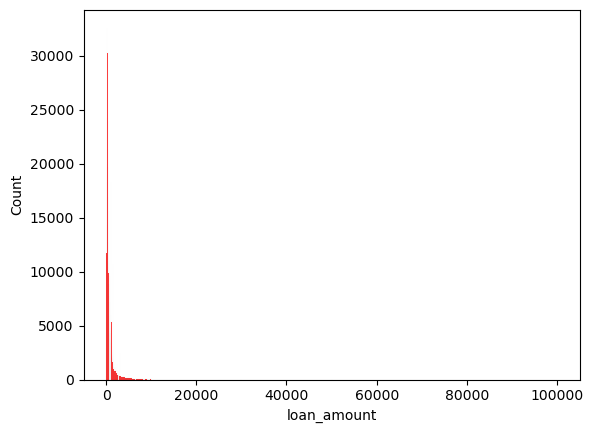

In [59]:
#Cek distribusi
sns.histplot(df["loan_amount"], color="red")

<Axes: xlabel='lender_count', ylabel='Count'>

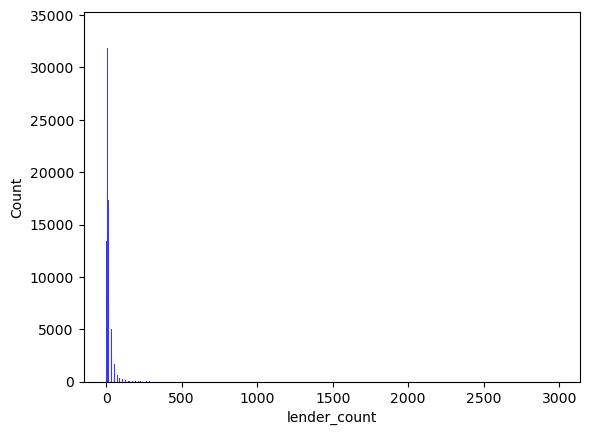

In [60]:
sns.histplot(df["lender_count"], color="blue")

In [61]:
#Cek Korelasi
df["loan_amount"].corr(df["lender_count"], method="spearman")

0.8020851596235975

insight:

Berdasarkan hasil di atas, terdapat korelasi linear yang sangat kuat antara loan amount (uang yang diminta) dengan lender count(pemberi pendanaan). Untuk itu, lender count tidak bisa digunakan sebagai alasan tingginya tingkat kepercayaan. Karena jika jumlah yang diminta tinggi, maka akan banyak orang juga yang ikut andil dalam pendanaan ini. Dan ini bukan semata-mata karena keinginan orang tersebut yang percaya terhadap aktifitas pendanaannya, tapi bisa jadi karena apa yang diminta terlalu tinggi.

---
# 2. Top 5 Activity Dengan Tingkat Kepercayaan Tinggi Dari Masing-Masing Sector
---

Setelah tahu bahwa banyaknya lender count tidak bisa merepresentasikan tingkat kepercayaan. Saya mencoba mengolah data untuk mencari tingkat kepercayaan dari sisi lain. Menurut saya, ada yang lebih representatif, yaitu melihat jumlah uang yang diberikan (Funded amount) terhadap aktifitas pendanaan yang diminta, dengan membaginya berdasarkan banyaknya pemberi dana (Lender Count). Ini menjadi lebih representatif untuk mengetahui seberapa besar kepercayaan yang diberikan oleh pemberi pinjaman terhadap sebuah permintaan pendanaan.

In [62]:
#Menambahkan kolom kepercayaan. Funded amount dibagi lendercount.
#Semakin tinggi nilainya, semakin tinggi tingkat kepercayaannya
df["tingkat_kepercayaan"] = df["funded_amount"] / df["lender_count"]


In [63]:
#Menghilangkan Sektor Personal Use
df = df[df["sector"]!="Personal Use"]

In [64]:
x = df.groupby(by="sector")[["activity"]].nunique()
x

/var/folders/5h/8f9ksys577g140vv6vkkv2gr0000gn/T/ipykernel_41739/3081753881.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = df.groupby(by="sector")[["activity"]].nunique()


,activity
sector,
Agriculture,14
Arts,9
Clothing,4
Construction,8
Education,4
Entertainment,3
Food,20
Health,6
Housing,2


In [65]:
#Menghilangkan permintaan-permintaan dengan jumlah lender_count 0
df = df[df["lender_count"] != 0]

In [66]:
#membersihkan data outlier dari tingkat kepercayaan
df["tingkat_kepercayaan"].describe()

count    615321.000000
mean         63.061023
std         184.337220
min          25.000000
25%          26.973684
50%          31.818182
75%          43.531469
max        9475.000000
Name: tingkat_kepercayaan, dtype: float64

In [67]:
#Menghilangkan Outlier agar data yang disajikan bukan data anomali
IQR = df["tingkat_kepercayaan"].quantile(0.75)-df["tingkat_kepercayaan"].quantile(0.25)
Ub= df["tingkat_kepercayaan"].quantile(0.75)+(1.5*IQR)
Lb= df["tingkat_kepercayaan"].quantile(0.25)-(1.5*IQR)
df = df[(df["tingkat_kepercayaan"] >= Lb) & (df["tingkat_kepercayaan"] <= Ub)]
df

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,tingkat_kepercayaan
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12.0,12,irregular,25.000000
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used in their business.,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,11.0,14,irregular,41.071429
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another one to rent out as a source of income,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2014-01-01 16:01:36+00:00,43.0,6,bullet,25.000000
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variety of new embroidery materials.,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00,11.0,8,irregular,25.000000
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00,14.0,16,monthly,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671173,1340263,75.0,125.0,Livestock,Agriculture,Pretend the flagged issue was addressed by KC.,Mexico,Iztacalco,MXN,294.0,2017-07-21 16:47:07+00:00,NaT,13.0,3,monthly,25.000000
671175,1340274,75.0,125.0,Livestock,Agriculture,Pretend the flagged issue was addressed by KC.,Mexico,Iztacalco,MXN,294.0,2017-07-21 23:31:40+00:00,NaT,13.0,3,monthly,25.000000
671177,1340279,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this loan use has been approved by VIVA QA",Kenya,Unknown,KES,138.0,2017-07-22 06:04:07+00:00,2017-07-24 12:44:16+00:00,13.0,1,monthly,25.000000
671186,1340300,25.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladriollo para construir una pila.'] - this loan use has been approved by VIVA QA",Paraguay,Concepción,USD,58.0,2017-07-24 08:09:10+00:00,2017-07-25 00:19:01+00:00,13.0,1,monthly,25.000000


In [68]:
#cek outlier apa sudah hilang
df["tingkat_kepercayaan"].describe()

count    542103.000000
mean         33.588217
std           9.360886
min          25.000000
25%          26.470588
50%          30.303030
75%          37.500000
max          68.367347
Name: tingkat_kepercayaan, dtype: float64

In [69]:
#membersihkan data-data yang tingkat kepercayaannya tidak ada
df=df.sort_values(by="tingkat_kepercayaan",ascending=False).dropna()

<Axes: xlabel='tingkat_kepercayaan', ylabel='Count'>

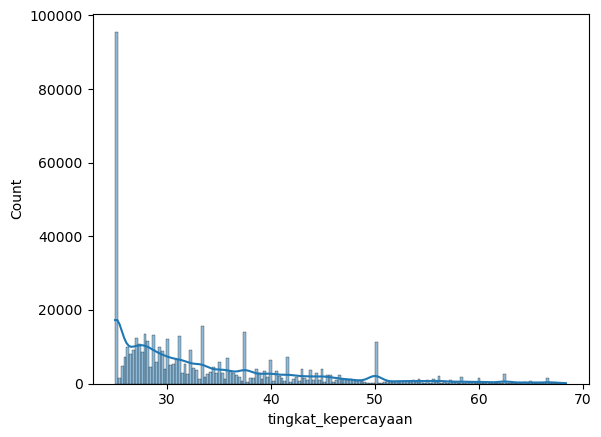

In [70]:
sns.histplot(df["tingkat_kepercayaan"],kde=True)

Berdasarkan tampilan, terlihat bahwa distribusi data pada tingkat kepercayaan yang ada dapat dikatakan tidak normal. untuk itu pengambilan keputusan, lebih baik menggunakan data nilat tengah (median), bukan dengan nilai rata-rata (mean). Hal ini didasari pada alasan-alasan berikut:
1. Median Tidak Terpengaruh oleh Outlier
    Nilai rata-rata (mean) sangat sensitif terhadap nilai-nilai yang ekstrem, dikhawatirkan nilainya akan terpengaruh oleh nilai ekstrem tersebut, sehingga tidak bisa mewakili keseluruhan data yang ada.
2. Median Lebih Representatif untuk Data Skewed
    Terlihat pada gambar di atas, bahwa data yang tersedia merupakan data dengan kondisi right-skewed (banyak nilai-nilai kecil di sebelah kanan). Maka dari itu, representasi bisa diwakilkan menggunakan data median, dan bukan Mean (rata-rata)

In [71]:
x

,activity
sector,
Agriculture,14
Arts,9
Clothing,4
Construction,8
Education,4
Entertainment,3
Food,20
Health,6
Housing,2


In [72]:
#Mencari aktifitas-aktifitas pada tiap sektor dan mengambil 5 urutan teratas
#1. Agriculture
Agri=df[df["sector"]=="Agriculture"]
pilihanAgri = Agri.sort_values(by= "tingkat_kepercayaan", ascending=False)
detailagri = pilihanAgri.groupby(by="activity")[["tingkat_kepercayaan"]].median().reset_index().sort_values(by="tingkat_kepercayaan", ascending=False)
Top5Agri=detailagri.sort_values(by= "tingkat_kepercayaan", ascending=False).head(5).reset_index()
Top5Agri.drop(columns="index", inplace=True)
Top5Agri.insert(0, 'Ranking', [1,2,3,4,5])
Top5Agri=Top5Agri.set_index('Ranking')

#2. Arts
Arts=df[df["sector"]=="Arts"]
pilihanArts = Arts.sort_values(by= "tingkat_kepercayaan", ascending=False)
detailarts = pilihanArts.groupby(by="activity")[["tingkat_kepercayaan"]].median().reset_index().sort_values(by="tingkat_kepercayaan", ascending=False)
Top5Arts=detailarts.sort_values(by= "tingkat_kepercayaan", ascending=False).head(5).reset_index()
Top5Arts.drop(columns="index", inplace=True)
Top5Arts.insert(0, 'Ranking', [1,2,3,4,5])
Top5Arts=Top5Arts.set_index('Ranking')

#3. Clothing
Clothing=df[df["sector"]=="Clothing"]
pilihanClothing = Clothing.sort_values(by= "tingkat_kepercayaan", ascending=False)
detailClothing = pilihanClothing.groupby(by="activity")[["tingkat_kepercayaan"]].median().reset_index().sort_values(by="tingkat_kepercayaan", ascending=False)
Top5Clothing=detailClothing.sort_values(by= "tingkat_kepercayaan", ascending=False).head(4).reset_index()
Top5Clothing.drop(columns="index", inplace=True)
Top5Clothing.insert(0, 'Ranking', [1,2,3,4])
Top5Clothing=Top5Clothing.set_index('Ranking')

#4. Construction
Construction=df[df["sector"]=="Construction"]
pilihanConstruction = Construction.sort_values(by= "tingkat_kepercayaan", ascending=False)
detailConstruction = pilihanConstruction.groupby(by="activity")[["tingkat_kepercayaan"]].median().reset_index().sort_values(by="tingkat_kepercayaan", ascending=False)
Top5Construction=detailConstruction.sort_values(by= "tingkat_kepercayaan", ascending=False).head(5).reset_index()
Top5Construction.drop(columns="index", inplace=True)
Top5Construction.insert(0, 'Ranking', [1,2,3,4,5])
Top5Construction=Top5Construction.set_index('Ranking')

#5. Education
Education=df[df["sector"]=="Education"]
pilihanEducation = Education.sort_values(by= "tingkat_kepercayaan", ascending=False)
detailEducation = pilihanEducation.groupby(by="activity")[["tingkat_kepercayaan"]].median().reset_index().sort_values(by="tingkat_kepercayaan", ascending=False)
Top5Education=detailEducation.sort_values(by= "tingkat_kepercayaan", ascending=False).head(4).reset_index()
Top5Education.drop(columns="index", inplace=True)
Top5Education.insert(0, 'Ranking', [1,2,3,4])
Top5Education=Top5Education.set_index('Ranking')

#6. Entertainment
Entertainment=df[df["sector"]=="Entertainment"]
pilihanEntertainment = Entertainment.sort_values(by= "tingkat_kepercayaan", ascending=False)
detailEntertainment = pilihanEntertainment.groupby(by="activity")[["tingkat_kepercayaan"]].median().reset_index().sort_values(by="tingkat_kepercayaan", ascending=False)
Top5Entertainment=detailEntertainment.sort_values(by= "tingkat_kepercayaan", ascending=False).head(3).reset_index()
Top5Entertainment.drop(columns="index", inplace=True)
Top5Entertainment.insert(0, 'Ranking', [1,2,3])
Top5Entertainment=Top5Entertainment.set_index('Ranking')

#7. Food
Food=df[df["sector"]=="Food"]
pilihanFood = Food.sort_values(by= "tingkat_kepercayaan", ascending=False)
detailFood = pilihanFood.groupby(by="activity")[["tingkat_kepercayaan"]].median().reset_index().sort_values(by="tingkat_kepercayaan", ascending=False)
Top5Food=detailFood.sort_values(by= "tingkat_kepercayaan", ascending=False).head(5).reset_index()
Top5Food.drop(columns="index", inplace=True)
Top5Food.insert(0, 'Ranking', [1,2,3,4,5])
Top5Food=Top5Food.set_index('Ranking')

#8. Health
Health=df[df["sector"]=="Health"]
pilihanHealth = Health.sort_values(by= "tingkat_kepercayaan", ascending=False)
detailHealth = pilihanHealth.groupby(by="activity")[["tingkat_kepercayaan"]].median().reset_index().sort_values(by="tingkat_kepercayaan", ascending=False)
Top5Health=detailHealth.sort_values(by= "tingkat_kepercayaan", ascending=False).head(5).reset_index()
Top5Health.drop(columns="index", inplace=True)
Top5Health.insert(0, 'Ranking', [1,2,3,4,5])
Top5Health=Top5Health.set_index('Ranking')

#9. Housing
Housing=df[df["sector"]=="Housing"]
pilihanHousing = Housing.sort_values(by= "tingkat_kepercayaan", ascending=False)
detailHousing = pilihanHousing.groupby(by="activity")[["tingkat_kepercayaan"]].median().reset_index().sort_values(by="tingkat_kepercayaan", ascending=False)
Top5Housing=detailHousing.sort_values(by= "tingkat_kepercayaan", ascending=False).head(2).reset_index()
Top5Housing.drop(columns="index", inplace=True)
Top5Housing.insert(0, 'Ranking', [1,2])
Top5Housing=Top5Housing.set_index('Ranking')

#10. Manufacturing
Manufacturing=df[df["sector"]=="Manufacturing"]
pilihanManufacturing = Manufacturing.sort_values(by= "tingkat_kepercayaan", ascending=False)
detailManufacturing= pilihanManufacturing.groupby(by="activity")[["tingkat_kepercayaan"]].median().reset_index().sort_values(by="tingkat_kepercayaan", ascending=False)
Top5Manufacturing=detailManufacturing.sort_values(by= "tingkat_kepercayaan", ascending=False).head(5).reset_index()
Top5Manufacturing.drop(columns="index", inplace=True)
Top5Manufacturing.insert(0, 'Ranking', [1,2,3,4,5])
Top5Manufacturing=Top5Manufacturing.set_index('Ranking')

#11. Retail
Retail=df[df["sector"]=="Retail"]
pilihanRetail = Retail.sort_values(by= "tingkat_kepercayaan", ascending=False)
detailRetail= pilihanRetail.groupby(by="activity")[["tingkat_kepercayaan"]].median().reset_index().sort_values(by="tingkat_kepercayaan", ascending=False)
Top5Retail=detailRetail.sort_values(by= "tingkat_kepercayaan", ascending=False).head(5).reset_index()
Top5Retail.drop(columns="index", inplace=True)
Top5Retail.insert(0, 'Ranking', [1,2,3,4,5])
Top5Retail=Top5Retail.set_index('Ranking')

#12. Services
Services=df[df["sector"]=="Services"]
pilihanServices = Services.sort_values(by= "tingkat_kepercayaan", ascending=False)
detailServices= pilihanServices.groupby(by="activity")[["tingkat_kepercayaan"]].median().reset_index().sort_values(by="tingkat_kepercayaan", ascending=False)
Top5Services=detailServices.sort_values(by= "tingkat_kepercayaan", ascending=False).head(5).reset_index()
Top5Services.drop(columns="index", inplace=True)
Top5Services.insert(0, 'Ranking', [1,2,3,4,5])
Top5Services=Top5Services.set_index('Ranking')

#13. Transportation
Transportation=df[df["sector"]=="Transportation"]
pilihanTransportation = Transportation.sort_values(by= "tingkat_kepercayaan", ascending=False)
detailTransportation= pilihanTransportation.groupby(by="activity")[["tingkat_kepercayaan"]].median().reset_index().sort_values(by="tingkat_kepercayaan", ascending=False)
Top5Transportation=detailTransportation.sort_values(by= "tingkat_kepercayaan", ascending=False).head(4).reset_index()
Top5Transportation.drop(columns="index", inplace=True)
Top5Transportation.insert(0, 'Ranking', [1,2,3,4])
Top5Transportation=Top5Transportation.set_index('Ranking')

#14. Wholesale
Wholesale=df[df["sector"]=="Wholesale"]
pilihanWholesale = Wholesale.sort_values(by= "tingkat_kepercayaan", ascending=False)
detailWholesale= pilihanWholesale.groupby(by="activity")[["tingkat_kepercayaan"]].median().reset_index().sort_values(by="tingkat_kepercayaan", ascending=False)
Top5Wholesale=detailWholesale.sort_values(by= "tingkat_kepercayaan", ascending=False).head(2).reset_index()
Top5Wholesale.drop(columns="index", inplace=True)
Top5Wholesale.insert(0, 'Ranking', [1,2])
Top5Wholesale=Top5Wholesale.set_index('Ranking')

<function matplotlib.pyplot.show(close=None, block=None)>

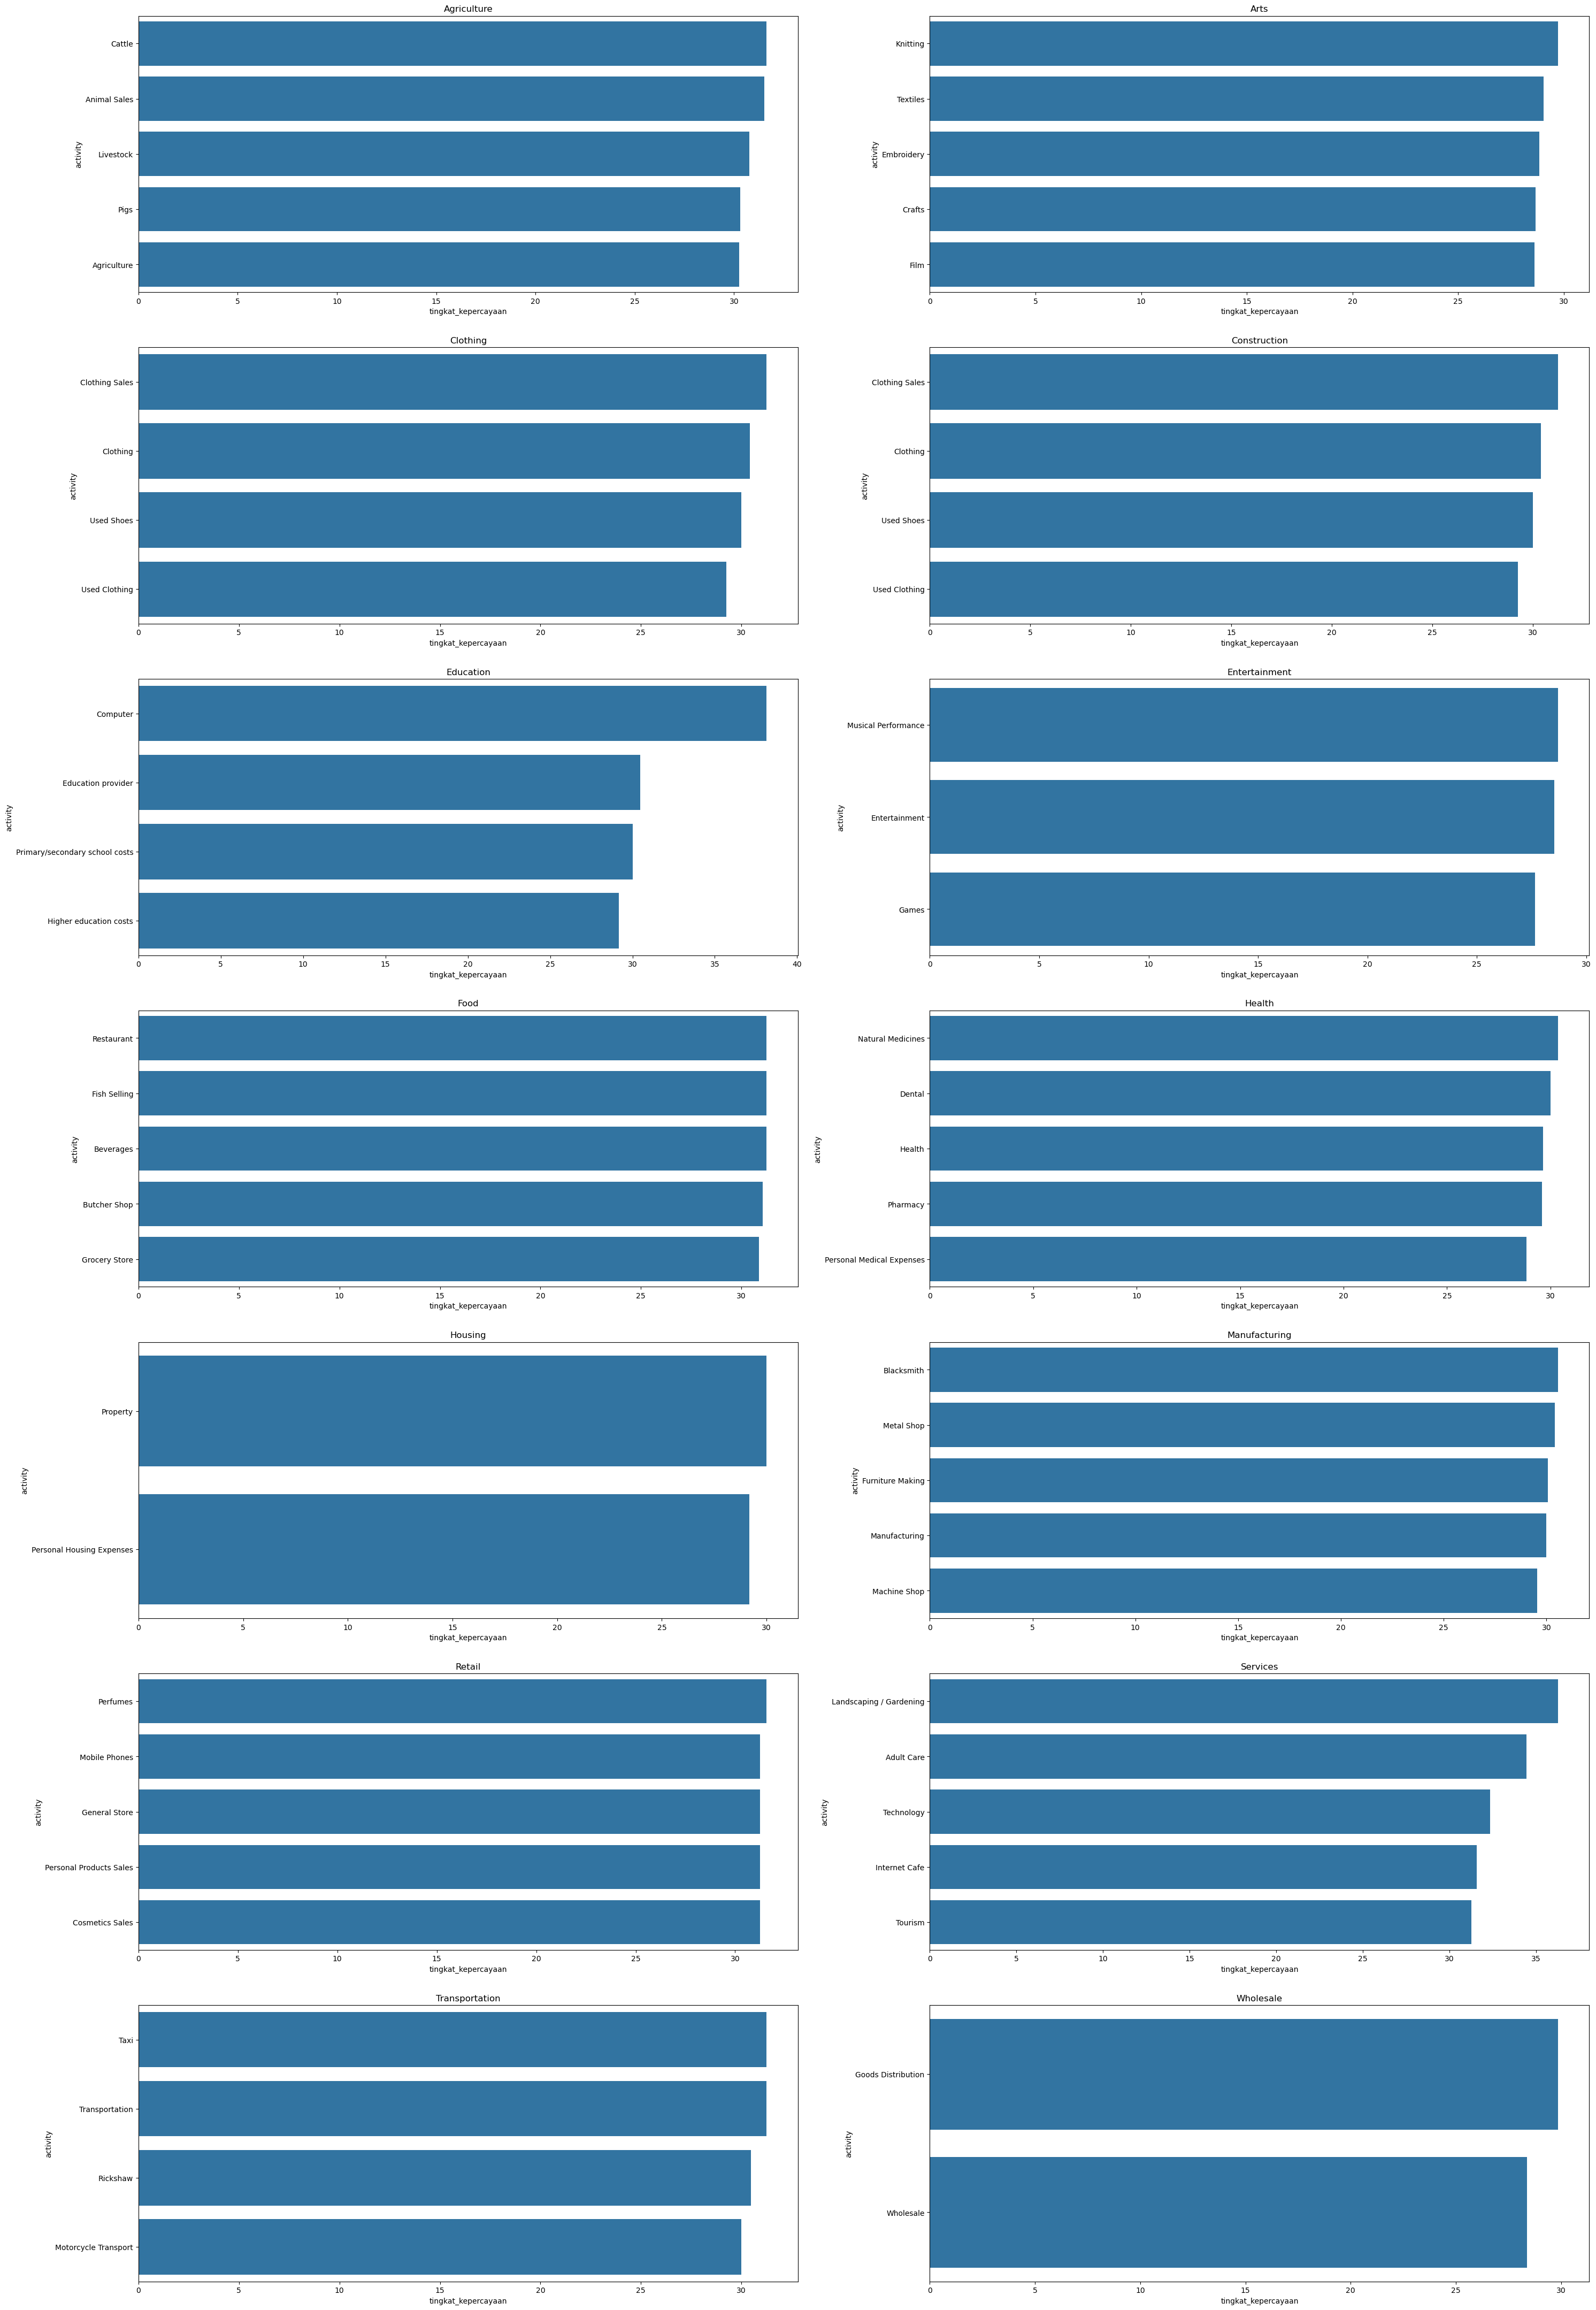

In [73]:
plt.figure(figsize=(35,55))
# 1. Agri
plt.subplot(7,2,1)
sns.barplot(x="tingkat_kepercayaan", y="activity", data=Top5Agri)
plt.title("Agriculture")
plt.show

# 2. Arts
plt.subplot(7,2,2)
sns.barplot(x="tingkat_kepercayaan", y="activity", data=Top5Arts)
plt.title("Arts")
plt.show

#3. Clothing
plt.subplot(7,2,3)
sns.barplot(x="tingkat_kepercayaan", y="activity", data=Top5Clothing)
plt.title("Clothing")
plt.show

#4. Construction
plt.subplot(7,2,4)
sns.barplot(x="tingkat_kepercayaan", y="activity", data=Top5Clothing)
plt.title("Construction")
plt.show

#5. Education
plt.subplot(7,2,5)
sns.barplot(x="tingkat_kepercayaan", y="activity", data=Top5Education)
plt.title("Education")
plt.show

#6. Entertainment
plt.subplot(7,2,6)
sns.barplot(x="tingkat_kepercayaan", y="activity", data=Top5Entertainment)
plt.title("Entertainment")
plt.show

#7. Food
plt.subplot(7,2,7)
sns.barplot(x="tingkat_kepercayaan", y="activity", data=Top5Food)
plt.title("Food")
plt.show

#8. Health
plt.subplot(7,2,8)
sns.barplot(x="tingkat_kepercayaan", y="activity", data=Top5Health)
plt.title("Health")
plt.show

#9. Housing
plt.subplot(7,2,9)
sns.barplot(x="tingkat_kepercayaan", y="activity", data=Top5Housing)
plt.title("Housing")
plt.show

#10. Manufacturing
plt.subplot(7,2,10)
sns.barplot(x="tingkat_kepercayaan", y="activity", data=Top5Manufacturing)
plt.title("Manufacturing")
plt.show

#11. Retail
plt.subplot(7,2,11)
sns.barplot(x="tingkat_kepercayaan", y="activity", data=Top5Retail)
plt.title("Retail")
plt.show

#12. Services
plt.subplot(7,2,12)
sns.barplot(x="tingkat_kepercayaan", y="activity", data=Top5Services)
plt.title("Services")
plt.show

#13. Transportation
plt.subplot(7,2,13)
sns.barplot(x="tingkat_kepercayaan", y="activity", data=Top5Transportation)
plt.title("Transportation")
plt.show

#13. Wholesale
plt.subplot(7,2,14)
sns.barplot(x="tingkat_kepercayaan", y="activity", data=Top5Wholesale)
plt.title("Wholesale")
plt.show

In [74]:
Top5Agri["sector"]="Agriculture"
Top5Arts["sector"]="Arts"
Top5Clothing["sector"]="Clothing"
Top5Construction["sector"]="Construction"
Top5Education["sector"]="Education"
Top5Entertainment["sector"]="Entertainment"
Top5Food["sector"]="Food"
Top5Health["sector"]="Health"
Top5Housing["sector"]="Housing"
Top5Manufacturing["sector"]="Manufacturing"
Top5Retail["sector"]="Retail"
Top5Services["sector"]="Services"
Top5Transportation["sector"]="Transportation"
Top5Wholesale["sector"]="Wholesale"

Top5ALL = pd.concat([Top5Agri,Top5Arts,Top5Clothing,Top5Construction,
                     Top5Education,Top5Entertainment,Top5Food,
                     Top5Health,Top5Housing,Top5Manufacturing,
                     Top5Retail,Top5Services,Top5Transportation,Top5Wholesale])
Top5ALL

,activity,tingkat_kepercayaan,sector
Ranking,,,
1,Cattle,31.636639,Agriculture
2,Animal Sales,31.521739,Agriculture
3,Livestock,30.769231,Agriculture
4,Pigs,30.303030,Agriculture
5,Agriculture,30.263158,Agriculture
...,...,...,...
2,Transportation,31.250000,Transportation
3,Rickshaw,30.468750,Transportation
4,Motorcycle Transport,30.000000,Transportation


In [75]:
#Dikumpulkan dalam Dataframe tingkat kepercayaan
dfTop5TingkatKepercayaan = pd.DataFrame(Top5ALL, columns=['activity', 'tingkat_kepercayaan',"sector"])
dfTop5TingkatKepercayaan = dfTop5TingkatKepercayaan.set_index(['sector', 'activity'])
dfTop5TingkatKepercayaan

tingkat_kepercayaan
sector         activity                                 
Agriculture    Cattle                          31.636639
               Animal Sales                    31.521739
               Livestock                       30.769231
               Pigs                            30.303030
               Agriculture                     30.263158
...                                                  ...
Transportation Transportation                  31.250000
               Rickshaw                        30.468750
               Motorcycle Transport            30.000000
Wholesale      Goods Distribution              29.850746
               Wholesale                       28.384104

[59 rows x 1 columns]

Insight:

Berdasarkan sektor Agrikultur, berikut adalah 5 aktifitas terbesar berdasarkan tingkat kepercayaan
1.	Cattle
2.	Animal Sales
3.	Livestock
4.	Pigs
5.	Agriculture

Berdasarkan sektor Arts, berikut adalah 5 aktifitas terbesar berdasarkan tingkat kepercayaan
1.	Knitting
2.	Textiles
3.	Embroidery
4.	Crafts
5.	Film

Berdasarkan sektor Clothing, Berikut adalah 4 aktifitas terbesar berdasarkan tingkat kepercayaan. Hanya diambil 4 karena memang data aktifitas yang tersedia hanya 4 saja.
1.	Clothing Sales
2.	Clothing
3.	Used Shoes
4.	Used Clothing

Berdasarkan sektor Construction, berikut adalah 5 aktifitas terbesar berdasarkan tingkat kepercayaan
1.	Construction Supplies
2.	Construction
3.	Cement
4.	Quarrying
5.	Timber Sales

Berdasarkan sektor Education, Berikut adalah 4 aktifitas terbesar berdasarkan tingkat kepercayaan. Hanya diambil 4 karena memang data aktifitas yang tersedia hanya 4 saja.
1.	Computer
2.	Education provider
3.	Primary/secondary school costs
4.	Higher education costs	

Berdasarkan sektor Entertainment, Berikut adalah 3 aktifitas terbesar berdasarkan tingkat kepercayaan. Hanya diambil 3 karena memang data aktifitas yang tersedia hanya 3 saja.
1.	Musical Performance
2.	Entertainment
3.	Games

Berdasarkan sektor Food, berikut adalah 5 aktifitas terbesar berdasarkan tingkat kepercayaan.
1.	Restaurant
2.	Fish Selling
3.	Beverages
4.	Butcher Shop
5.	Grocery Store	

Berdasarkan sektor Health, berikut adalah 5 aktifitas terbesar berdasarkan tingkat kepercayaan.	
1.	Natural Medicines
2.	Dental
3.	Health
4.	Pharmacy
5.	Personal Medical Expenses	

Berdasarkan sektor Housing, Berikut adalah 2 aktifitas terbesar berdasarkan tingkat kepercayaan. Hanya diambil 2 karena memang data aktifitas yang tersedia hanya 2 saja.
1.	Property
2.	Personal Housing Expenses

Berdasarkan sektor Manufacturing, berikut adalah 5 aktifitas terbesar berdasarkan tingkat kepercayaan.
1.	Blacksmith
2.	Metal Shop
3.	Furniture Making
4.	Manufacturing
5.	Machine Shop

Berdasarkan sektor Retail, berikut adalah 5 aktifitas terbesar berdasarkan tingkat kepercayaan.
1.	Perfumes
2.	Mobile Phones
3.	General Store
4.	Personal Products Sales
5.	Cosmetics Sales

Berdasarkan sektor Services, berikut adalah 5 aktifitas terbesar berdasarkan tingkat kepercayaan.
1.	Landscaping / Gardening
2.	Adult Care
3.	Technology
4.	Internet Cafe
5.	Tourism

Berdasarkan sektor Transportation, Berikut adalah 4 aktifitas terbesar berdasarkan tingkat kepercayaan. Hanya diambil 4 karena memang data aktifitas yang tersedia hanya 4 saja.
1.	Taxi
2.	Transportation
3.	Rickshaw
4. 	Motorcycle Transport

Berdasarkan sektor Wholesale, Berikut adalah 2 aktifitas terbesar berdasarkan tingkat kepercayaan. Hanya diambil 2 karena memang data aktifitas yang tersedia hanya 2 saja.
1.	Goods Distribution
2.	Wholesale	


---
# 3. Top 5 Activity Dari Tiap Sector Berdasarkan Rata-Rata Durasi Tercepat
---

In [76]:
#Menambahkan kolom durasi (seberapa lama) dari saat permintaan diajukan (posted_time) sampai permintaan terpenuhi (funded_time)
df["durasi"] = df["funded_time"] - df["posted_time"]

In [77]:
#Membuat kolom durasi menjadi float agar mudah dibaca
#total second dibagi dengan jumlah detik dalam satu hari
df["durasi"] = (df["durasi"].dt.total_seconds() / 86400).round(2)
df.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,tingkat_kepercayaan,durasi
165524,814371,3350.0,3350.0,Natural Medicines,Health,to buy herbal remedies that she can sell.,Paraguay,Ybycuí,PYG,58.0,2014-12-14 04:11:32+00:00,2014-12-25 03:51:10+00:00,8.0,49,monthly,68.367347,10.99
501344,1161509,3350.0,3350.0,Tailoring,Services,"to buy thread, fabric, needles, etc.",Paraguay,Paraguari,PYG,58.0,2016-10-02 00:13:42+00:00,2016-10-11 18:30:16+00:00,8.0,49,irregular,68.367347,9.76
74768,727022,6425.0,6425.0,Clothing Sales,Clothing,"to purchase shoes, polo shirts, sweaters, t-shirts, and blouses.",Peru,Cusco,PEN,119.0,2014-06-18 17:04:31+00:00,2014-06-27 20:09:17+00:00,6.0,94,irregular,68.351064,9.13
405316,1051947,1025.0,1025.0,Cafe,Food,"to buy soft drinks, snacks, bread, crackers, plastic bags, etc., to expand her inventory and thus increase her sales.",El Salvador,Unknown,USD,167.0,2016-04-09 17:36:59+00:00,2016-05-12 12:41:33+00:00,14.0,15,monthly,68.333333,32.79
626171,1287538,1025.0,1025.0,General Store,Retail,to purchase assorted groceries and other consumable products.,Philippines,"Jimenez-Butuay, Jimenez, Misamis Occidental",PHP,126.0,2017-04-27 07:21:47+00:00,2017-05-09 06:20:32+00:00,14.0,15,irregular,68.333333,11.96


In [78]:
#Cek outlier
df["durasi"].describe()

count    505086.000000
mean         14.942430
std          11.846386
min           0.000000
25%           5.440000
50%          10.510000
75%          24.340000
max          83.030000
Name: durasi, dtype: float64

In [79]:
#Menghilangkan Outlier agar data yang disajikan bukan data anomali
IQR = df["durasi"].quantile(0.75)-df["durasi"].quantile(0.25)
Ub= df["durasi"].quantile(0.75)+(1.5*IQR)
Lb= df["durasi"].quantile(0.25)-(1.5*IQR)
df = df[(df["durasi"] >= Lb) & (df["durasi"] <= Ub)]

In [80]:
#Cek outlier
df["durasi"].describe()

count    503415.000000
mean         14.800725
std          11.605421
min           0.000000
25%           5.430000
50%          10.460000
75%          24.160000
max          52.680000
Name: durasi, dtype: float64

<Axes: xlabel='durasi', ylabel='Count'>

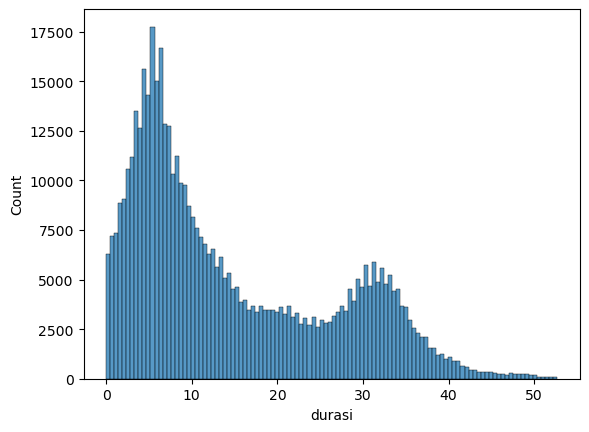

In [81]:
#cek distribusi
sns.histplot(df["durasi"])

Terlihat kolom durasi terdistribusi tidak normal, maka dalam perhitungan kembali menggunakan median agar lebih representatif.

In [82]:
x

,activity
sector,
Agriculture,14
Arts,9
Clothing,4
Construction,8
Education,4
Entertainment,3
Food,20
Health,6
Housing,2


In [83]:
#Mencari aktifitas-aktifitas pada tiap sektor dan mengambil 5 urutan teratas berdasarkan durasi
#Funded amount harus sama dengan loan amount
#1. Agriculture
AgricultureDuration=df[(df["sector"]=="Agriculture")&(df["funded_amount"]==df["loan_amount"])]
pilihanAgricultureDuration = AgricultureDuration.sort_values(by= "durasi")
detailAgricultureDuration= pilihanAgricultureDuration.groupby(by="activity")[["durasi"]].median().reset_index().sort_values(by="durasi")
Top5AgricultureDuration=detailAgricultureDuration.sort_values(by= "durasi").head(5).reset_index()
Top5AgricultureDuration.drop(columns="index", inplace=True)
Top5AgricultureDuration.insert(0, 'Ranking', [1,2,3,4,5])
Top5AgricultureDuration=Top5AgricultureDuration.set_index('Ranking')

#2 Arts
ArtsDuration=df[(df["sector"]=="Arts")&(df["funded_amount"]==df["loan_amount"])]
pilihanArtsDuration = ArtsDuration.sort_values(by= "durasi")
detailArtsDuration= pilihanArtsDuration.groupby(by="activity")[["durasi"]].median().reset_index().sort_values(by="durasi")
Top5ArtsDuration=detailArtsDuration.sort_values(by= "durasi").head(5).reset_index()
Top5ArtsDuration.drop(columns="index", inplace=True)
Top5ArtsDuration.insert(0, 'Ranking', [1,2,3,4,5])
Top5ArtsDuration=Top5ArtsDuration.set_index('Ranking')

#3. Clothing
ClothingDuration=df[(df["sector"]=="Clothing")&(df["funded_amount"]==df["loan_amount"])]
pilihanClothingDuration = ClothingDuration.sort_values(by= "durasi")
detailClothingDuration= pilihanClothingDuration.groupby(by="activity")[["durasi"]].median().reset_index().sort_values(by="durasi")
Top5ClothingDuration=detailClothingDuration.sort_values(by= "durasi").head(5).reset_index()
Top5ClothingDuration.drop(columns="index", inplace=True)
Top5ClothingDuration.insert(0, 'Ranking', [1,2,3,4])
Top5ClothingDuration=Top5ClothingDuration.set_index('Ranking')

#4. Construction
ConstructionDuration=df[(df["sector"]=="Construction")&(df["funded_amount"]==df["loan_amount"])]
pilihanConstructionDuration = ConstructionDuration.sort_values(by= "durasi")
detailConstructionDuration= pilihanConstructionDuration.groupby(by="activity")[["durasi"]].median().reset_index().sort_values(by="durasi")
Top5ConstructionDuration=detailConstructionDuration.sort_values(by= "durasi").head(5).reset_index()
Top5ConstructionDuration.drop(columns="index", inplace=True)
Top5ConstructionDuration.insert(0, 'Ranking', [1,2,3,4,5])
Top5ConstructionDuration=Top5ConstructionDuration.set_index('Ranking')

#5. Education
EducationDuration=df[(df["sector"]=="Education")&(df["funded_amount"]==df["loan_amount"])]
pilihanEducationDuration = EducationDuration.sort_values(by= "durasi")
detailEducationDuration= pilihanEducationDuration.groupby(by="activity")[["durasi"]].median().reset_index().sort_values(by="durasi")
Top5EducationDuration=detailEducationDuration.sort_values(by= "durasi").head(5).reset_index()
Top5EducationDuration.drop(columns="index", inplace=True)
Top5EducationDuration.insert(0, 'Ranking', [1,2,3,4])
Top5EducationDuration=Top5EducationDuration.set_index('Ranking')

#6. Entertainment
EntertainmentDuration=df[(df["sector"]=="Entertainment")&(df["funded_amount"]==df["loan_amount"])]
pilihanEntertainmentDuration = EntertainmentDuration.sort_values(by= "durasi")
detailEntertainmentDuration= pilihanEntertainmentDuration.groupby(by="activity")[["durasi"]].median().reset_index().sort_values(by="durasi")
Top5EntertainmentDuration=detailEntertainmentDuration.sort_values(by= "durasi").head(5).reset_index()
Top5EntertainmentDuration.drop(columns="index", inplace=True)
Top5EntertainmentDuration.insert(0, 'Ranking', [1,2,3])
Top5EntertainmentDuration=Top5EntertainmentDuration.set_index('Ranking')

#7. Food
FoodDuration=df[(df["sector"]=="Food")&(df["funded_amount"]==df["loan_amount"])]
pilihanFoodDuration = FoodDuration.sort_values(by= "durasi")
detailFoodDuration= pilihanFoodDuration.groupby(by="activity")[["durasi"]].median().reset_index().sort_values(by="durasi")
Top5FoodDuration=detailFoodDuration.sort_values(by= "durasi").head(5).reset_index()
Top5FoodDuration.drop(columns="index", inplace=True)
Top5FoodDuration.insert(0, 'Ranking', [1,2,3,4,5])
Top5FoodDuration=Top5FoodDuration.set_index('Ranking')

#8. Health
HealthDuration=df[(df["sector"]=="Health")&(df["funded_amount"]==df["loan_amount"])]
pilihanHealthDuration = HealthDuration.sort_values(by= "durasi")
detailHealthDuration= pilihanHealthDuration.groupby(by="activity")[["durasi"]].median().reset_index().sort_values(by="durasi")
Top5HealthDuration=detailHealthDuration.sort_values(by= "durasi").head(5).reset_index()
Top5HealthDuration.drop(columns="index", inplace=True)
Top5HealthDuration.insert(0, 'Ranking', [1,2,3,4,5])
Top5HealthDuration=Top5HealthDuration.set_index('Ranking')

#9. Housing
HousingDuration=df[(df["sector"]=="Housing")&(df["funded_amount"]==df["loan_amount"])]
pilihanHousingDuration = HousingDuration.sort_values(by= "durasi")
detailHousingDuration= pilihanHousingDuration.groupby(by="activity")[["durasi"]].median().reset_index().sort_values(by="durasi")
Top5HousingDuration=detailHousingDuration.sort_values(by= "durasi").head(5).reset_index()
Top5HousingDuration.drop(columns="index", inplace=True)
Top5HousingDuration.insert(0, 'Ranking', [1,2])
Top5HousingDuration=Top5HousingDuration.set_index('Ranking')

#10. Manufacturing
ManufacturingDuration=df[(df["sector"]=="Manufacturing")&(df["funded_amount"]==df["loan_amount"])]
pilihanManufacturingDuration = ManufacturingDuration.sort_values(by= "durasi")
detailManufacturingDuration= pilihanManufacturingDuration.groupby(by="activity")[["durasi"]].median().reset_index().sort_values(by="durasi")
Top5ManufacturingDuration=detailManufacturingDuration.sort_values(by= "durasi").head(5).reset_index()
Top5ManufacturingDuration.drop(columns="index", inplace=True)
Top5ManufacturingDuration.insert(0, 'Ranking', [1,2,3,4,5])
Top5ManufacturingDuration=Top5ManufacturingDuration.set_index('Ranking')

#11. Retail
RetailDuration=df[(df["sector"]=="Retail")&(df["funded_amount"]==df["loan_amount"])]
pilihanRetailDuration = RetailDuration.sort_values(by= "durasi")
detailRetailDuration= pilihanRetailDuration.groupby(by="activity")[["durasi"]].median().reset_index().sort_values(by="durasi")
Top5RetailDuration=detailRetailDuration.sort_values(by= "durasi").head(5).reset_index()
Top5RetailDuration.drop(columns="index", inplace=True)
Top5RetailDuration.insert(0, 'Ranking', [1,2,3,4,5])
Top5RetailDuration=Top5RetailDuration.set_index('Ranking')

#12. Services
ServicesDuration=df[(df["sector"]=="Services")&(df["funded_amount"]==df["loan_amount"])]
pilihanServicesDuration = ServicesDuration.sort_values(by= "durasi")
detailServicesDuration= pilihanServicesDuration.groupby(by="activity")[["durasi"]].median().reset_index().sort_values(by="durasi")
Top5ServicesDuration=detailServicesDuration.sort_values(by= "durasi").head(5).reset_index()
Top5ServicesDuration.drop(columns="index", inplace=True)
Top5ServicesDuration.insert(0, 'Ranking', [1,2,3,4,5])
Top5ServicesDuration=Top5ServicesDuration.set_index('Ranking')

#13. Transportation
WholesaleTransportaion=df[(df["sector"]=="Transportation")&(df["funded_amount"]==df["loan_amount"])]
pilihanTransportationDuration = WholesaleTransportaion.sort_values(by= "durasi")
detailTransportationDuration= pilihanTransportationDuration.groupby(by="activity")[["durasi"]].median().reset_index().sort_values(by="durasi")
Top5TransportationDuration=detailTransportationDuration.sort_values(by= "durasi").head(5).reset_index()
Top5TransportationDuration.drop(columns="index", inplace=True)
Top5TransportationDuration.insert(0, 'Ranking', [1,2,3,4])
Top5TransportationDuration=Top5TransportationDuration.set_index('Ranking')

#14. Wholesale
WholesaleDuration=df[(df["sector"]=="Wholesale")&(df["funded_amount"]==df["loan_amount"])]
pilihanWholesaleDuration = WholesaleDuration.sort_values(by= "durasi")
detailWholesaleDuration= pilihanWholesaleDuration.groupby(by="activity")[["durasi"]].median().reset_index().sort_values(by="durasi")
Top5WholesaleDuration=detailWholesaleDuration.sort_values(by= "durasi").head(5).reset_index()
Top5WholesaleDuration.drop(columns="index", inplace=True)
Top5WholesaleDuration.insert(0, 'Ranking', [1,2])
Top5WholesaleDuration=Top5WholesaleDuration.set_index('Ranking')

<function matplotlib.pyplot.show(close=None, block=None)>

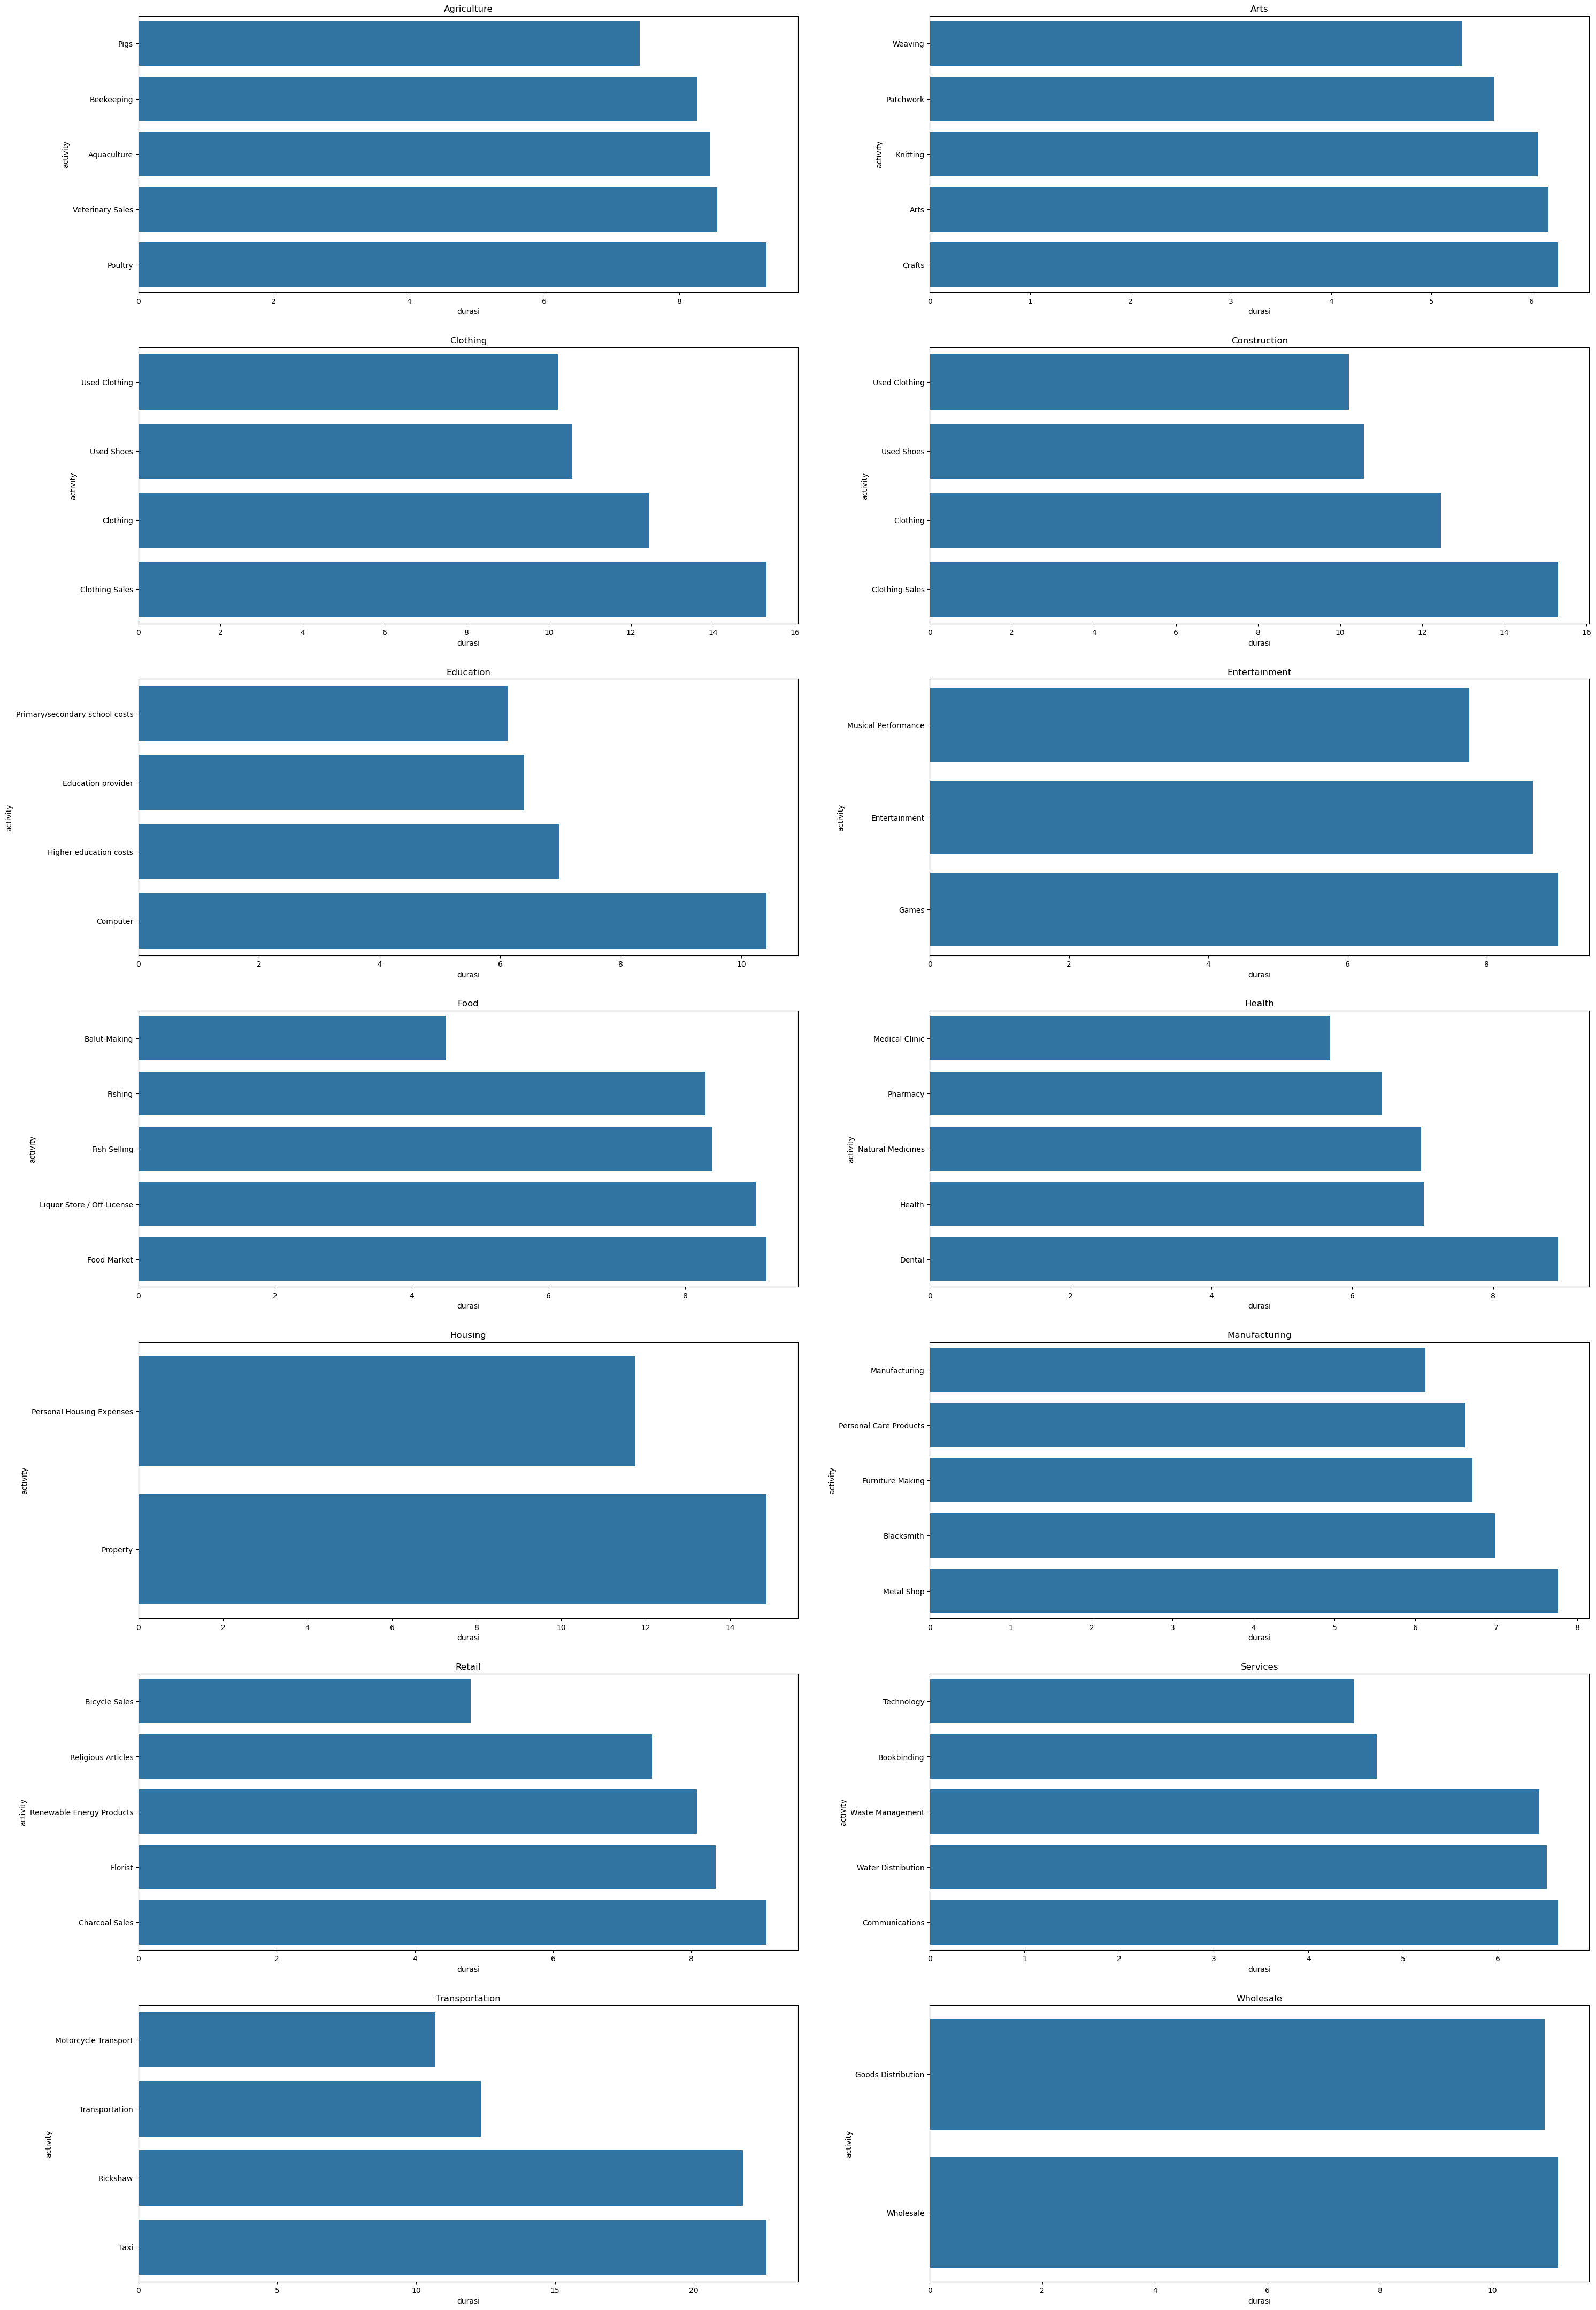

In [84]:
plt.figure(figsize=(35,55))
# 1. Agri
plt.subplot(7,2,1)
sns.barplot(x="durasi", y="activity", data=Top5AgricultureDuration)
plt.title("Agriculture")
plt.show

# 2. Arts
plt.subplot(7,2,2)
sns.barplot(x="durasi", y="activity", data=Top5ArtsDuration)
plt.title("Arts")
plt.show

#3. Clothing
plt.subplot(7,2,3)
sns.barplot(x="durasi", y="activity", data=Top5ClothingDuration)
plt.title("Clothing")
plt.show

#4. Construction
plt.subplot(7,2,4)
sns.barplot(x="durasi", y="activity", data=Top5ClothingDuration)
plt.title("Construction")
plt.show

#5. Education
plt.subplot(7,2,5)
sns.barplot(x="durasi", y="activity", data=Top5EducationDuration)
plt.title("Education")
plt.show

#6. Entertainment
plt.subplot(7,2,6)
sns.barplot(x="durasi", y="activity", data=Top5EntertainmentDuration)
plt.title("Entertainment")
plt.show

#7. Food
plt.subplot(7,2,7)
sns.barplot(x="durasi", y="activity", data=Top5FoodDuration)
plt.title("Food")
plt.show

#8. Health
plt.subplot(7,2,8)
sns.barplot(x="durasi", y="activity", data=Top5HealthDuration)
plt.title("Health")
plt.show

#9. Housing
plt.subplot(7,2,9)
sns.barplot(x="durasi", y="activity", data=Top5HousingDuration)
plt.title("Housing")
plt.show

#10. Manufacturing
plt.subplot(7,2,10)
sns.barplot(x="durasi", y="activity", data=Top5ManufacturingDuration)
plt.title("Manufacturing")
plt.show

#11. Retail
plt.subplot(7,2,11)
sns.barplot(x="durasi", y="activity", data=Top5RetailDuration)
plt.title("Retail")
plt.show

#12. Services
plt.subplot(7,2,12)
sns.barplot(x="durasi", y="activity", data=Top5ServicesDuration)
plt.title("Services")
plt.show

#13. Transportation
plt.subplot(7,2,13)
sns.barplot(x="durasi", y="activity", data=Top5TransportationDuration)
plt.title("Transportation")
plt.show

#13. Wholesale
plt.subplot(7,2,14)
sns.barplot(x="durasi", y="activity", data=Top5WholesaleDuration)
plt.title("Wholesale")
plt.show

In [85]:
#buat dalam satu dataframe
Top5AgricultureDuration["sector"]="Agriculture"
Top5ArtsDuration["sector"]="Arts"
Top5ClothingDuration["sector"]="Clothing"
Top5ConstructionDuration["sector"]="Construction"
Top5EducationDuration["sector"]="Education"
Top5EntertainmentDuration["sector"]="Entertainment"
Top5FoodDuration["sector"]="Food"
Top5HealthDuration["sector"]="Health"
Top5HousingDuration["sector"]="Housing"
Top5ManufacturingDuration["sector"]="Manufacturing"
Top5RetailDuration["sector"]="Retail"
Top5ServicesDuration["sector"]="Services"
Top5TransportationDuration["sector"]="Transportation"
Top5WholesaleDuration["sector"]="Wholesale"

Top5ALLDuration = pd.concat([Top5AgricultureDuration,Top5ArtsDuration,Top5ClothingDuration,Top5ConstructionDuration,
                     Top5EducationDuration,Top5EntertainmentDuration,Top5FoodDuration,
                     Top5HealthDuration,Top5HousingDuration,Top5ManufacturingDuration,
                     Top5RetailDuration,Top5ServicesDuration,Top5TransportationDuration,Top5WholesaleDuration])
Top5ALLDuration

,activity,durasi,sector
Ranking,,,
1,Pigs,7.410,Agriculture
2,Beekeeping,8.270,Agriculture
3,Aquaculture,8.460,Agriculture
4,Veterinary Sales,8.560,Agriculture
5,Poultry,9.290,Agriculture
...,...,...,...
2,Transportation,12.340,Transportation
3,Rickshaw,21.775,Transportation
4,Taxi,22.620,Transportation


In [86]:
#Dikumpulkan dalam Dataframe Durasi
dfTop5durasi = pd.DataFrame(Top5ALLDuration, columns=["activity", "durasi","sector"])
dfTop5durasi = dfTop5durasi.set_index(["sector", "activity"])
dfTop5durasi

durasi
sector         activity                  
Agriculture    Pigs                 7.410
               Beekeeping           8.270
               Aquaculture          8.460
               Veterinary Sales     8.560
               Poultry              9.290
...                                   ...
Transportation Transportation      12.340
               Rickshaw            21.775
               Taxi                22.620
Wholesale      Goods Distribution  10.930
               Wholesale           11.160

[59 rows x 1 columns]

Insight:

Berdasarkan sektor Agrikultur, berikut adalah 5 aktifitas tercepat berdasarkan durasi pemenuhan permintaan
1.	Pigs
2.	Beekeeping
3.	Aquaculture
4.	Veterinary Sales
5.	Poultry

Berdasarkan sektor Arts, berikut adalah 5 aktifitas tercepat berdasarkan durasi pemenuhan permintaan
1.	Weaving
2.	Patchwork
3.	Knitting
4.	Arts
5.	Crafts

Berdasarkan sektor Clothing, Berikut adalah 4 aktifitas tercepat berdasarkan durasi pemenuhan permintaan. Hanya diambil 4 karena memang data aktifitas yang tersedia hanya 4 saja.
1.	Used Clothing
2.	Used Shoes	
3.	Clothing
4.	Clothing Sales

Berdasarkan sektor Construction, berikut adalah 5 aktifitas tercepat berdasarkan durasi pemenuhan permintaan
1.	Well digging
2.	Quarrying
3.	Bricks
4.	Timber Sales
5.	Carpentry

Berdasarkan sektor Education, Berikut adalah 4 aktifitas tercepat berdasarkan durasi pemenuhan permintaan. Hanya diambil 4 karena memang data aktifitas yang tersedia hanya 4 saja.
1.	Primary/secondary school costs
2.	Education provider	
3.	Higher education costs
4.	Computer	

Berdasarkan sektor Entertainment, Berikut adalah 3 aktifitas tercepat berdasarkan durasi pemenuhan permintaan. Hanya diambil 3 karena memang data aktifitas yang tersedia hanya 3 saja.
1.	Musical Performance
2.	Entertainment
3.	Games

Berdasarkan sektor Food, berikut adalah 5 aktifitas tercepat berdasarkan durasi pemenuhan permintaan
1.	Balut-Making
2.	Fishing
3.	Fish Selling
4.	Liquor Store / Off-License
5.	Food Market

Berdasarkan sektor Health, berikut adalah 5 aktifitas tercepat berdasarkan durasi pemenuhan permintaan
1.	Medical Clinic
2.	Pharmacy
3.	Natural Medicines
4.	Health
5.	Dental		

Berdasarkan sektor Housing, Berikut adalah 2 aktifitas tercepat berdasarkan durasi pemenuhan permintaan. Hanya diambil 2 karena memang data aktifitas yang tersedia hanya 2 saja.
1.	Personal Housing Expenses
2.	Property

Berdasarkan sektor Manufacturing, berikut adalah 5 aktifitas tercepat berdasarkan durasi pemenuhan permintaan
1.	Manufacturing
2.	Personal Care Products
3.	Furniture Making
4.	Blacksmith
5.	Metal Shop

Berdasarkan sektor Retail, berikut adalah 5 aktifitas tercepat berdasarkan durasi pemenuhan permintaan
1.	Bicycle Sales
2.	Religious Articles
3.	Renewable Energy Products
4.	Florist
5.	Charcoal Sales

Berdasarkan sektor Services, berikut adalah 5 aktifitas tercepat berdasarkan durasi pemenuhan permintaan
1.	Technology
2.	Bookbinding
3.	Waste Management
4.	Water Distribution
5.	Communications	

Berdasarkan sektor Transportation, Berikut adalah 4 aktifitas terbesar berdasarkan tingkat kepercayaan. Hanya diambil 4 karena memang data aktifitas yang tersedia hanya 4 saja.
1.	Motorcycle Transport
2.	Transportation
3.	Rickshaw
4.	Taxi

Berdasarkan sektor Wholesale, Berikut adalah 2 aktifitas terbesar berdasarkan tingkat kepercayaan. Hanya diambil 2 karena memang data aktifitas yang tersedia hanya 2 saja.
1.	Goods Distribution
2.	Wholesale

---
### Menggabungkan data Durasi dengan data Tingkat Kepercayaan
---
Digabungkan dengan menggunakan metode inner merge, supaya hanya aktifitas yang ada pada keduanya saja yang masuk pada data gabungan ini. Bertujuan untuk mendapatkan hasil yang lebih komprehensif. Lalu dilihat dari korelasi antara durasi dan tingkat kepercayaan. Jika terdapat korelasi yang kuat, maka penentuan ranking cukup menggunakan salah satu dari durasi ataupun tingkat kepercayaan. Tapi, kalau korelasi lemah, maka ranking harus dilakukan berdasarkan keduanya.

In [87]:
dfTop5durasi

durasi
sector         activity                  
Agriculture    Pigs                 7.410
               Beekeeping           8.270
               Aquaculture          8.460
               Veterinary Sales     8.560
               Poultry              9.290
...                                   ...
Transportation Transportation      12.340
               Rickshaw            21.775
               Taxi                22.620
Wholesale      Goods Distribution  10.930
               Wholesale           11.160

[59 rows x 1 columns]

In [88]:
dfTop5TingkatKepercayaan

tingkat_kepercayaan
sector         activity                                 
Agriculture    Cattle                          31.636639
               Animal Sales                    31.521739
               Livestock                       30.769231
               Pigs                            30.303030
               Agriculture                     30.263158
...                                                  ...
Transportation Transportation                  31.250000
               Rickshaw                        30.468750
               Motorcycle Transport            30.000000
Wholesale      Goods Distribution              29.850746
               Wholesale                       28.384104

[59 rows x 1 columns]

In [89]:
#Menggabung dua data frame
gabung = df_merge = pd.merge(dfTop5durasi, dfTop5TingkatKepercayaan, on=['activity',"sector"], how='inner')

In [90]:
#Mencari korelasi antara durasi dengan tingkat kepercayaan
gabung["durasi"].corr(gabung["tingkat_kepercayaan"], method="spearman")

0.11952825352389976

Terlihat korelasi sangat lemah. Maka untuk membuat rekomendasi, harus menggunakan dua sistem ranking. Pertama berdasar pada durasi, dan kedua berdasar pada tingkat kepercayaan.

In [91]:
#sistem ranking berdasar pada durasi tercepat
gabungDurasi = gabung.sort_values(by="durasi")
gabungDurasi.reset_index(level=["activity","sector"], inplace=True)
gabungDurasi.insert(0, 'Ranking', range(1,len(gabung)+1))
gabungDurasi = gabungDurasi.set_index("Ranking")
top5gabungDurasi=gabungDurasi.head(5)
top5gabungDurasi

,activity,sector,durasi,tingkat_kepercayaan
Ranking,,,,
1,Technology,Services,4.48,32.340862
2,Knitting,Arts,6.06,29.716350
3,Manufacturing,Manufacturing,6.12,30.000000
4,Primary/secondary school costs,Education,6.13,30.000000
5,Crafts,Arts,6.26,28.666667


In [92]:
#sistem ranking berdasar pada tingkat kepercayaan terbesar
gabungPercaya = gabung.sort_values(by="tingkat_kepercayaan",ascending=False)
gabungPercaya.reset_index(level=["activity","sector"], inplace=True)
gabungPercaya.insert(0, 'Ranking', range(1,len(gabung)+1))
gabungPercaya = gabungPercaya.set_index("Ranking")
top5gabungPercaya=gabungPercaya.head(5)
top5gabungPercaya

,activity,sector,durasi,tingkat_kepercayaan
Ranking,,,,
1,Computer,Education,10.415,38.141026
2,Technology,Services,4.480,32.340862
3,Taxi,Transportation,22.620,31.250000
4,Clothing Sales,Clothing,15.305,31.250000
5,Fish Selling,Food,8.400,31.250000


insight:
- Top 5 gabungan berdasarkan durasi tercepat: 			
1.	Technology, sektor Services
2.	Knitting, sektor Arts
3.	Manufacturing, sektor Manufacturing
4.	Primary/secondary school costs, sektor Education
5.	Crafts, sektor Arts	

- Top 5 gabungan berdasarkan Tingkat kepercayaan terbesar:
1.	Computer, sektor Education
2.	Technology, sektor Services
3.	Taxi, sektor Transportation
4.	Clothing Sales, sektor Clothing
5.	Fish Selling, sektor Food

- Dari data keduanya, ternyata hanya aktifitas Technology dari sektor services yang berhasil masuk di urutan 5 teratas, baik berdasarkan durasi tercepat, maupun tingkat kepercayaan.
    

---
# 4. Top 10 Activity yang paling banyak diminta dari keseluruhan data.
---

In [93]:
z = df.groupby(["sector","activity"])[["activity"]].count()
z = z.rename(columns={'activity': 'Jumlah Permintaan'})
z = z.reset_index()
z= z.sort_values(by="Jumlah Permintaan",ascending=False)
z.insert(0, 'Ranking', range(1,len(z)+1))
z = z.set_index("Ranking")
z = z.head(10)
z

/var/folders/5h/8f9ksys577g140vv6vkkv2gr0000gn/T/ipykernel_41739/212175393.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  z = df.groupby(["sector","activity"])[["activity"]].count()


,sector,activity,Jumlah Permintaan
Ranking,,,
1,Agriculture,Farming,61611
2,Retail,General Store,46252
3,Housing,Personal Housing Expenses,26813
4,Food,Food Production/Sales,21701
5,Agriculture,Pigs,21326
6,Agriculture,Agriculture,20822
7,Retail,Retail,18474
8,Education,Higher education costs,18325
9,Clothing,Clothing Sales,17286


<function matplotlib.pyplot.show(close=None, block=None)>

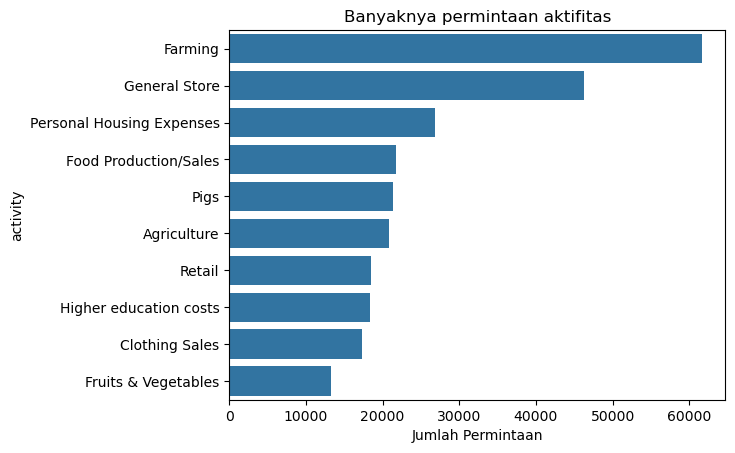

In [94]:
sns.barplot(x="Jumlah Permintaan", y="activity", data=z)
plt.title("Banyaknya permintaan aktifitas")
plt.show

Berikut adalah list dari banyaknya permintaan aktifitas
1.	aktifitas Farming dari sektor Agriculture 
2.	aktifitas General Store dari Sektor Retail
3.  aktifitas Personal Housing Expenses dari Sektor Housing
4.	aktifitas Food Production/Sales dari Sektor Food
5.	aktifitas Pigs dari Sektor Agriculture
6.	aktifitas Agriculture dari Sektor Agriculture
7.	aktifitas Retail dari Sektor Retail
8.	aktifitas Higher education costs dari Sektor Education
9.	aktifitas Clothing Sales dari Sektor Clothing 
10.	aktifitas Fruits & Vegetables dari Sektor Food

In [95]:
df

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,tingkat_kepercayaan,durasi
165524,814371,3350.0,3350.0,Natural Medicines,Health,to buy herbal remedies that she can sell.,Paraguay,Ybycuí,PYG,58.0,2014-12-14 04:11:32+00:00,2014-12-25 03:51:10+00:00,8.0,49,monthly,68.367347,10.99
501344,1161509,3350.0,3350.0,Tailoring,Services,"to buy thread, fabric, needles, etc.",Paraguay,Paraguari,PYG,58.0,2016-10-02 00:13:42+00:00,2016-10-11 18:30:16+00:00,8.0,49,irregular,68.367347,9.76
74768,727022,6425.0,6425.0,Clothing Sales,Clothing,"to purchase shoes, polo shirts, sweaters, t-shirts, and blouses.",Peru,Cusco,PEN,119.0,2014-06-18 17:04:31+00:00,2014-06-27 20:09:17+00:00,6.0,94,irregular,68.351064,9.13
405316,1051947,1025.0,1025.0,Cafe,Food,"to buy soft drinks, snacks, bread, crackers, plastic bags, etc., to expand her inventory and thus increase her sales.",El Salvador,Unknown,USD,167.0,2016-04-09 17:36:59+00:00,2016-05-12 12:41:33+00:00,14.0,15,monthly,68.333333,32.79
626171,1287538,1025.0,1025.0,General Store,Retail,to purchase assorted groceries and other consumable products.,Philippines,"Jimenez-Butuay, Jimenez, Misamis Occidental",PHP,126.0,2017-04-27 07:21:47+00:00,2017-05-09 06:20:32+00:00,14.0,15,irregular,68.333333,11.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377233,1024168,150.0,150.0,Fruits & Vegetables,Food,"to purchase green vegetables, two crates of tomatoes, and onions for resale.",Kenya,Msambweni,KES,164.0,2016-02-17 12:53:22+00:00,2016-02-22 13:10:34+00:00,12.0,6,irregular,25.000000,5.01
377235,1023772,300.0,300.0,Dairy,Agriculture,to buy cow feed to increase milk production and meet her customers' demand in order to increase her income and expand her business.,Kenya,Limuru,KES,388.0,2016-02-17 04:22:09+00:00,2016-02-22 03:40:59+00:00,14.0,12,monthly,25.000000,4.97
377241,1024173,325.0,325.0,Bakery,Food,to buy more materials for her snack business,Malawi,Mangochi,MWK,381.0,2016-02-17 12:55:45+00:00,2016-02-22 05:30:50+00:00,6.0,13,irregular,25.000000,4.69
377248,1024253,100.0,100.0,Food Production/Sales,Food,"to buy a box of exercise books, eight boxes of writing implements, and seven boxes of cookies.",Togo,Tokoin,XOF,296.0,2016-02-17 16:00:25+00:00,2016-02-23 07:35:08+00:00,7.0,4,irregular,25.000000,5.65
